<h2> Name: Larissa Justo Evaldt </h2>
<h3> Student Number: 2017270 </h3>

Importing the necessary Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the dataset as a Pandas dataframe

In [2]:
df = pd.read_csv('Medical Appointment No Shows.csv')

Let's check how many rows and columns there is in the dataset

In [3]:
df.shape

(110527, 14)

We can see that there are 110,527 entries and 14 columns. Now, let's have a look at the first 5 entries:

In [4]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's check if there are any missing values:

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Good, there is no missing value. Let's check for duplicate roles:

In [6]:
df.duplicated().sum()

0

No duplicates either! Let's check the datatypes:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe(include='object')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Feature Engineering

Let's look at columns in order. Starting at PatientId and AppointmentID:

In [10]:
len(df['PatientId'].unique())

62299

In [11]:
len(df['AppointmentID'].unique())

110527

We have very few repeated AppointmentID's, like 5 only, meaning that almost all entry for appoint id is unique, and that doesn't add any value. We have a good few repeated Patient Id's, meaning patients can have more than one appointment, maybe we could check how many times the patient has missed an appointment before, but for now I will leave that out. Since theses columns are unique identifiers, I don't think they should be used to predict if a patient will show up or not, so I will drop these columns:

In [12]:
df = df.drop(['PatientId', 'AppointmentID'], 1)

In [13]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Good, now let's look at Gender:

In [14]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

Let's see how many females and how many males there are in the dataset

In [15]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

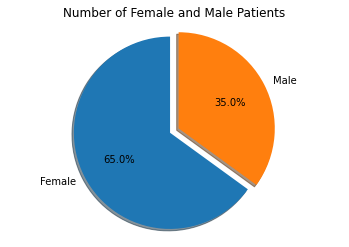

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [71837, 38685]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Female and Male Patients')
plt.show()

We have a lot more females in the dataset than males. Let's try to see the percentage of females who didn't show up, and the percentage of males

In [17]:
gender_counts = df.groupby(['Gender', 'No-show']).count()
gender_counts

ScheduledDay  AppointmentDay    Age  Neighbourhood  \
Gender No-show                                                       
F      No              57246           57246  57246          57246   
       Yes             14594           14594  14594          14594   
M      No              30962           30962  30962          30962   
       Yes              7725            7725   7725           7725   

                Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
Gender No-show                                                             
F      No             57246         57246     57246       57246    57246   
       Yes            14594         14594     14594       14594    14594   
M      No             30962         30962     30962       30962    30962   
       Yes             7725          7725      7725        7725     7725   

                SMS_received  
Gender No-show                
F      No              57246  
       Yes             14594  
M      No              30962  
       Yes              7725

From the 71837 females, 57246 showed up and 14591 didn't. From the 38685 males 30962 showed up and 7723 didn't. Let's see the percentage:

In [18]:
females_noshow = (14591 * 100) / 71837
females_noshow

20.3112602140958

In [19]:
males_noshow = (7723 * 100) / 38685
males_noshow

19.9638102623756

We can see that the percentage is almost equal, around 20% of men and around 20% of women missed their appointments

Let's use one hot encoding for this variable, since gender is a nominal variable and there is no order. If we used ordinal encoding it could impose an ordinal relationship where there is none.

In [20]:
df_dummies = pd.get_dummies(df['Gender'])

In [21]:
df_dummies

,F,M
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
110522,1,0
110523,1,0
110524,1,0
110525,1,0


In [22]:
df = pd.concat([df, df_dummies], axis=1)

In [23]:
df.drop('Gender', inplace=True, axis=1)

In [24]:
df.head(2)

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,F,M
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1


F and M are not very easy to understand so I will rename columns to a better name:

In [25]:
df = df.rename(columns={'F': 'GenderFemale', 'M': 'GenderMale'})

In [26]:
df.head(2)

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1


#### Let's look at the dates now

ScheduleDay and AppointmentDay data type is currently type object. We should change it to proper datetime format. Also when we looked at the first rows, we have times for scheduled day but all of the entries for appointment day had time equal 00:00, let's check if that is the same for the whole dataset, because if it is, it means that the time of the appointments was not recorded, since it doesn't make sense for medical appointments to be at midnight

In [27]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

So for appointment day we have only the day, the time was not recorded. Appointments go from the end of April of 2016 until beginning of June of the same year, meaning we have data for a little bit over a month of appointments. Let's change from object to datetime format:

In [28]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [29]:
df.head(1)

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale
0,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0


In [30]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.head(1)

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0


Checking if it worked

In [31]:
df.ScheduledDay.dtype, df.AppointmentDay.dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

Since we have the date that the apointments were made, which is the scheduled day, and the day of the actual appointment, we can calculate how much time the patient had to wait from scheduling until appointment day as there could be a correlation, it makes sence to think that the longer the person have to wait, the higher the chance they won't show up. Let's do it:

In [32]:
df['DaysWaited'] = (df.AppointmentDay - df.ScheduledDay).dt.days
df.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,-1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,-1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,-1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,-1


We have a problem, because the scheduling time was recorded and the appointment time was not and is if it was at midnight, the waiting days for appointments that were on the same they that they were scheduled have a value of -1. For example, the first row is as if the appointment was at midnight and was scheduled after at 6pm.

In [33]:
df['DaysWaited'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: DaysWaited, dtype: float64

It turns out we also have a value -7, which makes no sense. An appointment can't have been scheduled a week after it happened. Let's first see how many -1 we have, since that was probably the appointments on the same day, we will change -1 to 0

In [34]:
same_day = df[df['DaysWaited'] == -1]

In [35]:
same_day

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,-1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,-1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,-1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,No,1,0,-1
110512,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,No,1,0,-1
110513,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0,1,-1
110514,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,No,1,0,-1


I think that is exactly what is happening, because the time for appointment is recorded as midnight, everything is a day less than if should be. Let's check for another number

In [36]:
two_day = df[df['DaysWaited'] == 2]

In [37]:
two_day

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited
11,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,0,1,2
15,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No,1,0,2
18,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No,1,0,2
25,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,No,0,1,2
48,2016-04-26 07:19:49+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,2016-05-30 07:36:09+00:00,2016-06-02 00:00:00+00:00,52,NOVA PALESTINA,0,0,0,0,0,1,No,0,1,2
110198,2016-05-30 07:22:08+00:00,2016-06-02 00:00:00+00:00,67,JABOUR,0,0,0,0,0,1,No,1,0,2
110199,2016-05-30 07:21:34+00:00,2016-06-02 00:00:00+00:00,60,BONFIM,0,0,0,0,0,0,No,0,1,2
110200,2016-05-30 07:21:46+00:00,2016-06-02 00:00:00+00:00,50,SANTA MARTHA,0,0,0,0,0,1,No,0,1,2


As we can see, scheduled on the 26th, appointment os the 29th, that should be 3 days of wait and not 2. I will increase all the entries for Days Waited by 1.

In [38]:
df = df.reset_index(drop=True)

In [39]:
for x in range(len(df)):
    numDays = df.loc[x, 'DaysWaited']
    numDays += 1
    df['DaysWaited'][x] = numDays

<ipython-input-39-7f4f27386d95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DaysWaited'][x] = numDays


In [40]:
df

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,0
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,0
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,0
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,0
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,35
110523,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,35
110524,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,41
110525,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,41


In [41]:
df['DaysWaited'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DaysWaited, dtype: float64

We still have negative values, let's check how many

In [42]:
days_negative = df[df['DaysWaited'] < 0]
days_negative

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited
27033,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,0,1,-1
55226,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1,0,-1
64175,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,1,0,-1
71533,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,1,0,-6
72362,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,0,1,-1


It's just 5 rows, I will drop these ones since it doesn't make sense for the appointment to be schedule after

In [43]:
df = df[df['DaysWaited'] >= 0] 

In [44]:
df['DaysWaited'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DaysWaited, dtype: float64

Now we have the number of days that each patient had to wait from when they scheduled an appointment, to the actual appointment date. And we can have appointments on the same day of scheduling, meaning no wait, up until 179 days of wait, that's almost 6 months. 

Let's drop the scheduled day since now that we calculated waiting time, it's not useful anymore. 

In [45]:
df = df.drop('ScheduledDay', 1)
df

,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited
0,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,0
1,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,0
2,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,0
3,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,0
4,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,35
110523,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,35
110524,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,41
110525,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,41


And let's separate appointment day into weekday, monthday, month and year to see if people are more likely to miss their appointment on a different week day, or if the day or month influences 

In [46]:
df['AppointmentDay_weekday'] = df['AppointmentDay'].dt.dayofweek
df['AppointmentDay_day'] = df['AppointmentDay'].dt.day
df['AppointmentDay_month'] = df['AppointmentDay'].dt.month
df['AppointmentDay_year'] = df['AppointmentDay'].dt.year

In [47]:
df

,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month,AppointmentDay_year
0,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,0,4,29,4,2016
1,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,0,4,29,4,2016
2,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,0,4,29,4,2016
3,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,0,4,29,4,2016
4,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,0,4,29,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,35,1,7,6,2016
110523,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,35,1,7,6,2016
110524,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,41,1,7,6,2016
110525,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,1,0,41,1,7,6,2016


Let's explore the values

In [48]:
df.groupby('AppointmentDay_weekday').size()

AppointmentDay_weekday
0    22714
1    25638
2    25866
3    17246
4    19019
5       39
dtype: int64

It starts on monday, number 0 represents monday all the way to 6 that is sunday. We can see that most appointments were scheduled for the week days, monday to friday with more appointments scheduled on tuesday and wednesday, just a few on saturday and none on sunday

I counting how many shows and no-shows by weekday, then just selecting the first column because otherwise it prints the same values for all columns

In [49]:
weekday_counts = df.groupby(['AppointmentDay_weekday', 'No-show']).count()['AppointmentDay']
weekday_counts

AppointmentDay_weekday  No-show
0                       No         18025
                        Yes         4689
1                       No         20488
                        Yes         5150
2                       No         20774
                        Yes         5092
3                       No         13909
                        Yes         3337
4                       No         14982
                        Yes         4037
5                       No            30
                        Yes            9
Name: AppointmentDay, dtype: int64

Calculate percentages just to see if there is any weekday where patients are more likely to miss appointments:

In [50]:
monday_noshow = (4689 * 100) / 22714
print('Percentage of missed appointments on monday: ' + str(monday_noshow))
tuesday_noshow = (5150 * 100) / 25638
print('Percentage of missed appointments on tuesday: ' + str(tuesday_noshow))
wednesday_noshow = (5092 * 100) / 25866
print('Percentage of missed appointments on wednesday: ' + str(wednesday_noshow))
thursday_noshow = (3337 * 100) / 17246
print('Percentage of missed appointments on thursday: ' + str(thursday_noshow))
friday_noshow = (4037 * 100) / 19019
print('Percentage of missed appointments on friday: ' + str(friday_noshow))
saturday_noshow = (9 * 100) / 39
print('Percentage of missed appointments on saturday: ' + str(saturday_noshow))

Percentage of missed appointments on monday: 20.643655895042706
Percentage of missed appointments on tuesday: 20.087370309696546
Percentage of missed appointments on wednesday: 19.686074383360396
Percentage of missed appointments on thursday: 19.349414356952337
Percentage of missed appointments on friday: 21.226142278773857
Percentage of missed appointments on saturday: 23.076923076923077


It doesn't seem to have much difference either, on saturday people are slightly more likely to miss their appointment, but we have a lot less data for saturday then for the other days

In [51]:
df.groupby('AppointmentDay_day').size()

AppointmentDay_day
1     4464
2     8686
3     8345
4     4167
5     4272
6     8571
7     4416
8     4479
9     4519
10    4308
11    4474
12    4394
13    3987
14      39
16    4613
17    4371
18    4373
19    4270
20    3828
24    4009
25    3909
29    3235
30    4514
31    4279
dtype: int64

We have appointments scheduled for almost every day of the month, I won't calculate percentages for days

In [52]:
df.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    80836
6    26451
dtype: int64

We have data for April, May and June. Let's do the same we did with weekday to calculate percentages of missing appointments for each month

In [53]:
month_counts = df.groupby(['AppointmentDay_month', 'No-show']).count()['AppointmentDay']
month_counts

AppointmentDay_month  No-show
4                     No          2602
                      Yes          633
5                     No         64037
                      Yes        16799
6                     No         21569
                      Yes         4882
Name: AppointmentDay, dtype: int64

In [54]:
april_noshow = (633 * 100) / 3235
print('Percentage of missed appointments on April: ' + str(monday_noshow))
may_noshow = (16799 * 100) / 80836
print('Percentage of missed appointments on May: ' + str(tuesday_noshow))
june_noshow = (4882 * 100) / 26451
print('Percentage of missed appointments on June: ' + str(wednesday_noshow))

Percentage of missed appointments on April: 20.643655895042706
Percentage of missed appointments on May: 20.087370309696546
Percentage of missed appointments on June: 19.686074383360396


I think from what we see until now, neither the gender, nor weekday or month influence on whether a person will show or not, the percentage is around 20% for all these ones

In [55]:
df.groupby('AppointmentDay_year').size()

AppointmentDay_year
2016    110522
dtype: int64

All of the appointments were for 2016 so I will delete the column

In [56]:
df = df.drop('AppointmentDay_year', 1)
df.head(2)

,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
0,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,0,4,29,4
1,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,0,4,29,4


We can see that we have a minimum value of -1 for age, which is very weird.  Maximum value is 115, which is a very high value, it's not that common for people to live up to that age. Let's investigate that further and check how many entries we have with -1 and how many with over 100:

Now that we have the appointment day broken down in weekday, day, and month we can delete AppointmentDay since it's redundant

In [57]:
df = df.drop('AppointmentDay', 1)
df.head(2)

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,0,4,29,4
1,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,0,4,29,4


#### Let's go to Age Now

In [58]:
df['Age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We have a negative value for age, which doesn't make sense, nobody can have negative. Let's check how many:

In [59]:
negative_age =  df[df['Age'] < 0]

In [60]:
negative_age

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
99832,-1,ROMÃO,0,0,0,0,0,0,No,1,0,0,0,6,6


So, we have only one entry with -1 value for age. That must have been a mistake. Since it's just one value, I will just drop it.

In [61]:
df = df[df['Age'] != -1]

Let's check how many entries for age over 100, since that is a very high age:

In [62]:
high_age = df[df['Age'] > 100]

In [63]:
high_age

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
58014,102,CONQUISTA,0,0,0,0,0,0,No,1,0,0,1,3,5
63912,115,ANDORINHAS,0,0,0,0,1,0,Yes,1,0,3,3,19,5
63915,115,ANDORINHAS,0,0,0,0,1,0,Yes,1,0,3,3,19,5
68127,115,ANDORINHAS,0,0,0,0,1,0,Yes,1,0,38,0,16,5
76284,115,ANDORINHAS,0,0,0,0,1,0,No,1,0,0,0,30,5
90372,102,MARIA ORTIZ,0,0,0,0,0,0,No,1,0,2,3,2,6
97666,115,SÃO JOSÉ,0,1,0,0,0,1,No,1,0,15,4,3,6


There is only 7 entries and 4 of them are from the same patient, so we actually have only 4 different patients with age over 100, 2 patients with age 102 and 2 patients with age 115. Let's check age in a box plot:

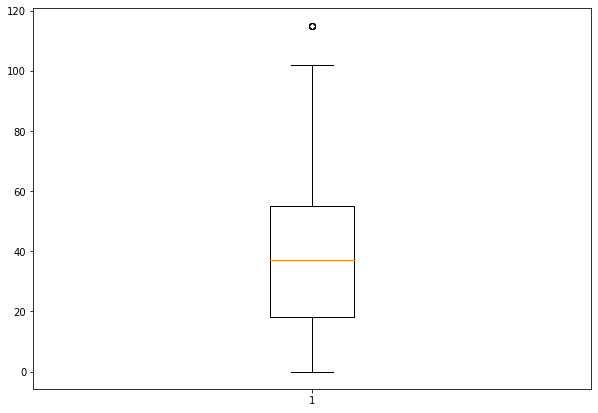

In [64]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(df.Age)
  
plt.show()

The 115 values for age are outliers, and they don't seem realistic, so I will be dropping them

In [65]:
df = df[df.Age < 115]

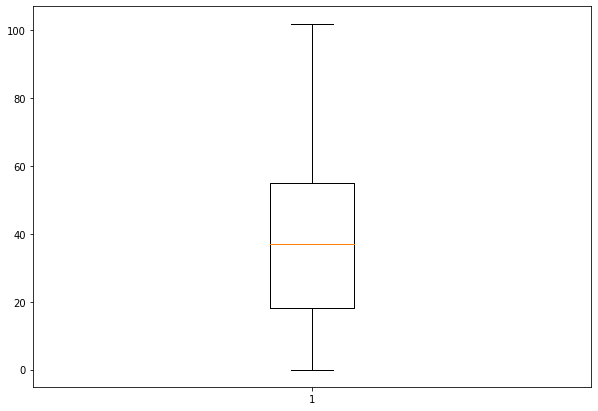

In [66]:
fig = plt.figure(figsize =(10, 7))
  
plt.boxplot(df.Age)
  
plt.show()

We can see that most patients are between 20 and 60 years old, but we have values from 0 to 102

Let's check how many values for age that equal 0

In [67]:
newborn = df[df['Age'] == 0]

In [68]:
newborn.shape

(3539, 15)

We have 3539 entries with age 0. Giving that this is probably babies less than a year old, they defininitely shouldn't be alcoholic, I think there probably shouldn't be any baby with diabetes and hipertension. Let's check that:

In [69]:
newborn.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
count,3539.0,3539.000000,3539.0,3539.0,3539.0,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,0.0,0.014693,0.0,0.0,0.0,0.000283,0.253461,0.486296,0.513704,10.699915,1.792314,12.965810,5.180277
std,0.0,0.120340,0.0,0.0,0.0,0.016810,0.435054,0.499883,0.499883,14.989570,1.376574,9.068031,0.471033
min,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000
50%,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,11.000000,5.000000
75%,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,17.000000,3.000000,19.000000,5.000000
max,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,111.000000,4.000000,31.000000,6.000000


We can see that that none of the entries with age equal 0 have hipertension, diabetes or alcoholism, which looks right.

#### Let's go to neighboorhood

In [70]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [71]:
len(df['Neighbourhood'].unique())

81

We have a lot of different neighborhoods, if I transform this into numbers with one hot enconding, we will have a lot of extra columns. So I will delete it for now, if the accuracy is too low, I will try to use it later

In [72]:
df = df.drop('Neighbourhood', 1)
df.head(2)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
0,62,0,1,0,0,0,0,No,1,0,0,4,29,4
1,56,0,0,0,0,0,0,No,0,1,0,4,29,4


#### Let's have a look at our target variable, No-show

In [73]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [74]:
df['No-show'].value_counts()

No     88205
Yes    22311
Name: No-show, dtype: int64

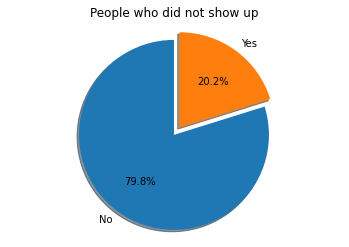

In [75]:
labels = 'No', 'Yes'
sizes = [88205, 22311]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('People who did not show up')
plt.show()

We can see that around 20% of patients did not show up, and around 80% did show up.

No-show is a binary feature with only 2 possible values. We can use pandas replace() to encode them:

In [76]:
df['No-show'] = df['No-show'].replace({'Yes':1, 'No':0})

In [77]:
df

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
0,62,0,1,0,0,0,0,0,1,0,0,4,29,4
1,56,0,0,0,0,0,0,0,0,1,0,4,29,4
2,62,0,0,0,0,0,0,0,1,0,0,4,29,4
3,8,0,0,0,0,0,0,0,1,0,0,4,29,4
4,56,0,1,1,0,0,0,0,1,0,0,4,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,0,1,0,35,1,7,6
110523,51,0,0,0,0,0,1,0,1,0,35,1,7,6
110524,21,0,0,0,0,0,1,0,1,0,41,1,7,6
110525,38,0,0,0,0,0,1,0,1,0,41,1,7,6


Just checking if we still have the same values:

In [78]:
df['No-show'].unique()

array([0, 1])

In [79]:
df['No-show'].value_counts(normalize=True) * 100

0    79.811973
1    20.188027
Name: No-show, dtype: float64

In [80]:
df

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
0,62,0,1,0,0,0,0,0,1,0,0,4,29,4
1,56,0,0,0,0,0,0,0,0,1,0,4,29,4
2,62,0,0,0,0,0,0,0,1,0,0,4,29,4
3,8,0,0,0,0,0,0,0,1,0,0,4,29,4
4,56,0,1,1,0,0,0,0,1,0,0,4,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,0,1,0,35,1,7,6
110523,51,0,0,0,0,0,1,0,1,0,35,1,7,6
110524,21,0,0,0,0,0,1,0,1,0,41,1,7,6
110525,38,0,0,0,0,0,1,0,1,0,41,1,7,6


Looks good. We have all numeric variables now, let's try to predict with these features and see what we get

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split

#### Create a Validation dataset

In [82]:
X = df.drop(columns=['No-show']).values
y = df['No-show'].values
f"Shapes of X={X.shape} y={y.shape} #No-show cases={y.sum()}"

'Shapes of X=(110516, 13) y=(110516,) #No-show cases=22311'

In [83]:
X[0]

array([62,  0,  1,  0,  0,  0,  0,  1,  0,  0,  4, 29,  4])

In [84]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

#### Build Models

In [85]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NBG', GaussianNB()))
models.append(('NBM', MultinomialNB()))

#### Evaluate each of the models
Here we are running a loop as many times as the length of the models array. Using StratifiedKfold cross-validator and cross_val_score to evaluate a score by cross-validation. Saving the results and the name to arrays to be able to plot.

In [86]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))    

KNN: 0.769081 (0.002362)
NBG: 0.772339 (0.003204)
NBM: 0.706318 (0.003300)


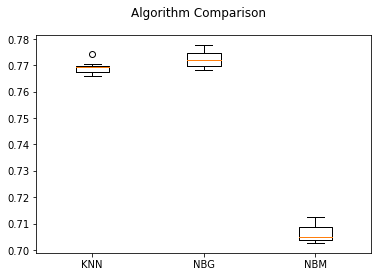

In [87]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that the Naive Bays Gaussian did slightly better than the other ones, as the the box is squashed at the top, it reached almost 80% while the others achied average 70, and 78

### Make Predictions 

We have to choose an algorithm to use to make predictions.
The results in the previous section suggest that the Naive Bays Gaussian was the most accurate model. I
will use this model as our final model.
Let's use it on our validation set now and get an idea of the accuracy of the model.

In [88]:
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

### Evaluate Predictions 

The predictions are evauated by comparing them to the expected results in the validation set,
then calculate classification accuracy, as well as a confusion matrix and a classification report. 

In [89]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.7743847267462902
[[16535  1161]
 [ 3826   582]]


We can see that the accuracy is 0.774 or about 77% on the hold out dataset.
The confusion matrix provides an indication of the types of errors made:
* 16535 observations were positive and were predicted to be positive. 
* 1161 observations were positive but were predicted to be negative. 
* 3826 observations were negative and were predicted to be negative 
* 582 observations were negative but were predicted to be positive

In [90]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     17696
           1       0.33      0.13      0.19      4408

    accuracy                           0.77     22104
   macro avg       0.57      0.53      0.53     22104
weighted avg       0.72      0.77      0.73     22104



The precision presents how many were correctly classified among each class, we can see 0 has a higher precision than 1, I think this means the accuracy for no shows was very low.

The support is the number of occurences of the given class in the dataset, that means our dataset was imbalanced since we had 17697 of class 0 and 4408 of class 1.

In [91]:
df.head(1)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,GenderFemale,GenderMale,DaysWaited,AppointmentDay_weekday,AppointmentDay_day,AppointmentDay_month
0,62,0,1,0,0,0,0,0,1,0,0,4,29,4


#### Printing out message "Patient will: (Show/No Show)" according to the prediction

For that I am creating a new patient with random values and passing this new patient to the model to predict. Then simply checking with an if statement if the prediction was a 1 or a 0. A 1 means the patient won't show and a 0 that they will.

In [92]:
patient = [[7,  0,  0,  0,  0,  2,  0,  1,  0,  5,  3, 30,  5]]

prediction = model.predict((patient))

print("The Patient Will: ")

if prediction == 1:
    print("No Show")
else:
    print("Show")

The Patient Will: 
Show


Trying to do some feature selection using statistical tests to select features that have strongest relationship with the target variable. The example below uses the chi-squared (chi²) statistical test for non-negative features to select the 10 of the best features of the dataset. 
Code taken from: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Import libraries

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

The no-show column is in the middle of the dataset, it's column index 7, so we have to select a range

In [94]:
rng = list(range(0,7)) + list(range(8,13))
print (rng)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]


Select the independent and the target columns. No-show was index 7.

In [95]:
X = df.iloc[:,rng]  
y = df.iloc[:,7]  

Apply SelectKBest class to extract top 10 best features

In [96]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

Concat two dataframes for better visualization 

In [97]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

Naming the columns and printinf the 10 best features

In [98]:
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))

                 Specs         Score
9           DaysWaited  87665.442955
0                  Age   5820.615411
6         SMS_received   1201.724188
2         Hipertension    112.633850
1          Scholarship     84.867802
3             Diabetes     23.530309
11  AppointmentDay_day     10.361339
5              Handcap      5.639634
8           GenderMale      1.207027
7         GenderFemale      0.650051


I will choose to use just the top 8, since the other 2 have very small score

In [99]:
new_df = df[['DaysWaited', 'Age', 'SMS_received', 'Hipertension', 'Scholarship', 'Diabetes', 'AppointmentDay_day', 'Handcap', 'No-show']]

In [100]:
new_df.head(5)

,DaysWaited,Age,SMS_received,Hipertension,Scholarship,Diabetes,AppointmentDay_day,Handcap,No-show
0,0,62,0,1,0,0,29,0,0
1,0,56,0,0,0,0,29,0,0
2,0,62,0,0,0,0,29,0,0
3,0,8,0,0,0,0,29,0,0
4,0,56,0,1,0,1,29,0,0


Let's try again with this shorter dataset

In [101]:
X = new_df.drop(columns=['No-show']).values
y = new_df['No-show'].values
f"Shapes of X={X.shape} y={y.shape} #No-show cases={y.sum()}"

'Shapes of X=(110516, 8) y=(110516,) #No-show cases=22311'

In [102]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [103]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NBG', GaussianNB()))
models.append(('NBM', MultinomialNB()))

In [104]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))    

KNN: 0.769149 (0.002436)
NBG: 0.771841 (0.003025)
NBM: 0.705074 (0.003464)


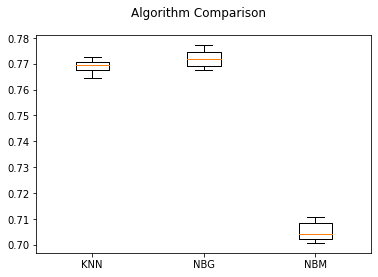

In [105]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Unfortunately, it didn't help, as we are still getting almost the same scores